## 四、基于相似度的方法

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
np.random.seed(61)

# 构造两个数据点的集群
X_inliers1 = 0.2 * np.random.randn(100, 2)
X_inliers2 = 0.5 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers1 + 2, X_inliers2 - 2]

In [8]:
# 构造⼀些离群的点
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X_outliers

array([[ 1.7009103 ,  2.62723641],
       [ 3.0283787 ,  0.63705072],
       [ 2.20120906,  2.67284436],
       [ 2.13006573,  3.59838412],
       [ 0.09545748, -2.75578673],
       [-1.08227979,  3.78988275],
       [ 2.8358146 ,  3.70532146],
       [ 2.12338142,  2.53235092],
       [-2.75879005,  0.50836407],
       [-1.81536606,  0.50073075],
       [ 2.5785346 , -0.99128854],
       [ 3.2089958 ,  1.29059671],
       [-2.63343897, -3.62811811],
       [ 1.94057451, -0.57387495],
       [-2.11236443,  1.18621921],
       [ 1.26068333,  1.96438381],
       [ 0.09243366, -2.72103456],
       [-3.14878511,  3.65961189],
       [-1.12421921, -1.59313047],
       [-0.62874079, -1.69632662]])

In [9]:
# 拼成训练集
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
n_outliers

20

In [10]:
ground_truth = np.ones(len(X), dtype=int)
# 打标签，群内点构造离群值为1，离群点构造离群值为-1
ground_truth[-n_outliers:] = -1

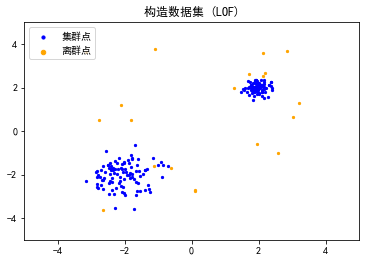

In [11]:
plt.title('构造数据集 (LOF)')
plt.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], color='b', s=5, label='集群点')
plt.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], color='orange', s=5, label='离群点')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]

plt.show()

In [12]:
# 训练模型（找出每个数据的实际离群值）
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# 对单个数据集进⾏⽆监督检测时，以1和-1分别表⽰⾮离群点与离群点
y_pred = clf.fit_predict(X)
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1])

In [16]:
# 找出构造离群值与实际离群值不同的点
n_errors = y_pred != ground_truth
X_pred = np.c_[X,n_errors]
X_pred

array([[ 1.91370089,  2.08787511,  0.        ],
       [ 1.99974764,  2.21222457,  0.        ],
       [ 2.04067296,  2.13311455,  0.        ],
       [ 1.79127696,  1.74321778,  0.        ],
       [ 1.99169322,  1.77040453,  0.        ],
       [ 1.97483141,  2.20402971,  0.        ],
       [ 2.20592414,  1.98653431,  0.        ],
       [ 1.88005036,  2.04803586,  0.        ],
       [ 1.55899342,  1.88695449,  0.        ],
       [ 2.30849877,  2.13623491,  0.        ],
       [ 2.0252911 ,  1.72394487,  0.        ],
       [ 1.85198658,  1.91437319,  0.        ],
       [ 2.02312152,  2.10036722,  0.        ],
       [ 1.98205648,  2.17458364,  0.        ],
       [ 1.87627235,  1.60746642,  0.        ],
       [ 2.29014489,  1.56135399,  1.        ],
       [ 1.83198237,  2.20203141,  0.        ],
       [ 1.87690088,  1.84219018,  0.        ],
       [ 1.93050818,  2.34493562,  0.        ],
       [ 2.09172428,  1.78821337,  0.        ],
       [ 1.82482177,  1.81718903,  0.   

In [17]:
X_scores = clf.negative_outlier_factor_
# 实际离群值有正有负，转化为正数并保留其差异性（不是直接取绝对值）
X_scores_nor = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
X_pred = np.c_[X_pred,X_scores_nor]
X_pred = pd.DataFrame(X_pred,columns=['x','y','pred','scores'])
X_pred_same = X_pred[X_pred['pred'] == False]
X_pred_different = X_pred[X_pred['pred'] == True]

# 直观地看⼀看数据
X_pred.head()

,x,y,pred,scores
0,1.913701,2.087875,0.0,0.000494
1,1.999748,2.212225,0.0,0.005255
2,2.040673,2.133115,0.0,0.001521
3,1.791277,1.743218,0.0,0.015652
4,1.991693,1.770405,0.0,0.010113


C:\Users\shepherd\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 12070 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shepherd\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 12032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shepherd\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 12070 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\shepherd\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 12032 missing from current font.
  font.set_text(s, 0, flags=flags)


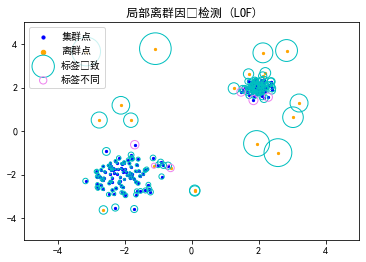

In [18]:
plt.title('局部离群因⼦检测 (LOF)')
plt.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], color='b', s=5, label='集群点')
plt.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], color='orange', s=5, label='离群点')
# 以标准化之后的局部离群值为半径画圆，以圆的⼤小直观表⽰出每个数据点的离群程度
plt.scatter(X_pred_same.values[:,0], X_pred_same.values[:, 1], s=1000 * X_pred_same.values[:, 3],
            edgecolors='c', facecolors='none', label='标签⼀致')
plt.scatter(X_pred_different.values[:, 0], X_pred_different.values[:, 1], s=1000 * X_pred_different.values[:, 3],
            edgecolors='violet', facecolors='none', label='标签不同')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()       